### Import the libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

### Get data from source

In [2]:
def get_crypto_data(ticker_symbol, start_date, end_date):
    ticker_data = yf.Ticker(ticker_symbol)
    crypto_data = ticker_data.history(period='1d', start=start_date, end=end_date)
    return crypto_data

btc_data = get_crypto_data('BTC-USD', '2010-01-01', '2023-05-10')
eth_data = get_crypto_data('ETH-USD', '2010-01-01', '2023-05-10')
ltc_data = get_crypto_data('LTC-USD', '2010-01-01', '2023-05-10')


### Update data in csv

In [3]:
def update_dataset(df, filename): 
    df.to_csv(filename)
    return df
# Update the Bitcoin dataset and save as CSV
btc_df = update_dataset(btc_data, "bitcoin_dataset.csv")

# Update the Ethereum dataset and save as CSV
eth_df = update_dataset(eth_data, "ethereum_dataset.csv")

# Update the Litecoin dataset and save as CSV
ltc_df = update_dataset(ltc_data, "litecoin_dataset.csv")

### Retrieval of data

In [4]:
def retrieve_price(df, date):
    df['Date'] = pd.to_datetime(df.index).strftime('%Y-%m-%d')

    
    if date in df.index:
        price = df.loc[date]
        return price
    else:
        return "Price data not available for the given date."

btc_price = retrieve_price(btc_df, "2023-05-09")
print("Bitcoin price on 2023-05-18:", btc_price)
# Test the exact date price retrieval function for Ethereum
eth_price = retrieve_price(eth_df, "2023-05-09")
print("Ethereum price on 2023-05-18:", eth_price)

# Test the exact date price retrieval function for Litecoin
ltc_price = retrieve_price(ltc_df, "2023-05-09")
print("Litecoin price on 2023-05-18:", ltc_price)


Bitcoin price on 2023-05-18: Open            27695.068359
High            27821.400391
Low             27375.601562
Close           27658.775391
Volume           14128593256
Dividends                0.0
Stock Splits             0.0
Date              2023-05-09
Name: 2023-05-09 00:00:00+00:00, dtype: object
Ethereum price on 2023-05-18: Open            1849.061035
High             1860.66748
Low             1832.906982
Close           1848.603149
Volume           6129516088
Dividends               0.0
Stock Splits            0.0
Date             2023-05-09
Name: 2023-05-09 00:00:00+00:00, dtype: object
Litecoin price on 2023-05-18: Open              77.87397
High             80.059753
Low              77.595108
Close            80.021584
Volume           468132043
Dividends              0.0
Stock Splits           0.0
Date            2023-05-09
Name: 2023-05-09 00:00:00+00:00, dtype: object


### Visualize the price data

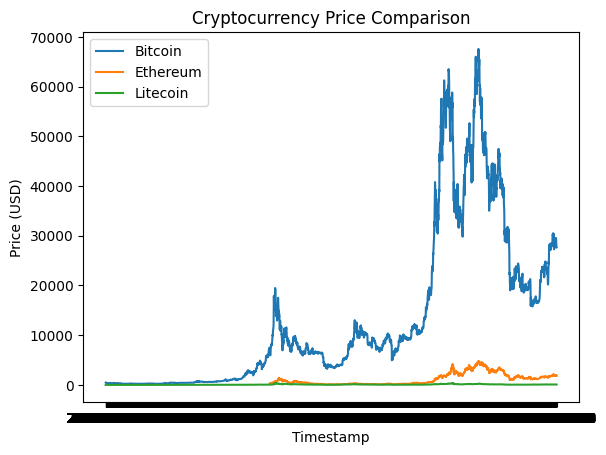

In [9]:
plt.plot(btc_df["Date"], btc_df["Close"], label="Bitcoin")
plt.plot(eth_df["Date"], eth_df["Close"], label="Ethereum")
plt.plot(ltc_df["Date"], ltc_df["Close"], label="Litecoin")
plt.xlabel("Timestamp")
plt.ylabel("Price (USD)")
plt.title("Cryptocurrency Price Comparison")
plt.legend()
plt.show()